In [84]:
import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
df = pd.read_csv(r"C:\Users\aiou0\STORE\ALL_CODE\MachineLearning\FULL_PROJECT REDO\DATA\Original\DOWNLOAD-CUC7SguObJEIkPWSqWLaUAEoQGVmVCLFK4ujZGyxiyM=.csv",sep=';',on_bad_lines = 'skip')

In [51]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [52]:
df.shape


(6488, 47)

In [60]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [62]:
selected_columns = ['Smiles','Standard Value']  # Use the correct case based on your DataFrame
filter_df = df[selected_columns]
print(filter_df.head())


                                              Smiles  Standard Value
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...           230.0
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1         50000.0
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...         50000.0
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...            35.0
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...            13.0


In [65]:
data = df[['Smiles', 'Standard Value']].copy()  # Copy relevant columns to new DataFrame
data['Standard Value'] = data['Standard Value'] * 1e-9  # Convert to M

# Display the new DataFrame
print(data.head())

                                              Smiles  Standard Value
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...    2.300000e-16
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1    5.000000e-14
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...    5.000000e-14
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...    3.500000e-17
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...    1.300000e-17


In [69]:
def norm_value(input):
    norm = []
    for i in input['Standard Value']:
        if i > 100000000:
            norm.append(100000000)
        else:
            norm.append(i)

    # Use .loc to avoid SettingWithCopyWarning
    input.loc[:, 'standard_value_norm'] = norm
    
    # Drop the original 'Standard Value' column
    x = input.drop(columns=['Standard Value'])
    return x

# Assuming filter_df is your DataFrame containing 'Standard Value'
standard_df = norm_value(filter_df)
print(standard_df.head())


                                              Smiles  standard_value_norm
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...                230.0
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1              50000.0
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...              50000.0
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...                 35.0
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...                 13.0


In [70]:
def convert_to_pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        # Convert to molar
        molar_value = i * 1e-9
        
        # Calculate pIC50
        if molar_value > 0:  # Avoid log(0)
            pIC50_value = -np.log10(molar_value)
        else:
            pIC50_value = np.nan  # Assign NaN for invalid cases
            
        pIC50.append(pIC50_value)

    input['pIC50'] = pIC50
    return input

# Assuming filter_df is your DataFrame containing 'Standard Value'
standard_df = norm_value(filter_df)  # Normalize standard values
standard_df = convert_to_pIC50(standard_df)  # Convert to pIC50

print(standard_df.head())

                                              Smiles  standard_value_norm  \
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...                230.0   
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1              50000.0   
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...              50000.0   
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...                 35.0   
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...                 13.0   

      pIC50  
0  6.638272  
1  4.301030  
2  4.301030  
3  7.455932  
4  7.886057  


In [71]:
standard_df.head()

,Smiles,standard_value_norm,pIC50
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,6.638272
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,4.301030
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,4.301030
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,7.455932
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,7.886057


In [72]:
standard_df.shape

(6488, 3)

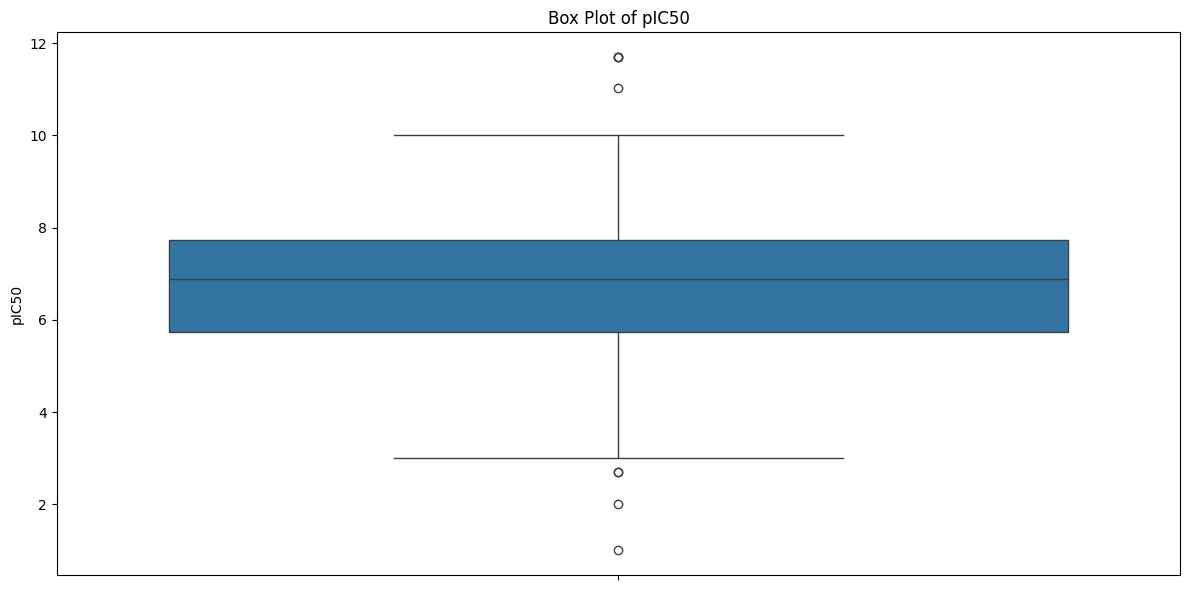

In [81]:
# Set up the figure size
plt.figure(figsize=(12, 6))

sns.boxplot(y='pIC50', data=standard_df)
plt.title('Box Plot of pIC50')
plt.ylabel('pIC50')

# Show the plot
plt.tight_layout()
plt.show()

In [86]:
# Assuming standard_df is your DataFrame

# Check for missing values in the target variable
print("Missing values in pIC50:", standard_df['pIC50'].isnull().sum())

# Option 1: Drop rows with missing target values
standard_df_clean = standard_df.dropna(subset=['pIC50'])

# Alternatively, if you want to fill missing values:
# standard_df_clean['pIC50'] = standard_df_clean['pIC50'].fillna(standard_df_clean['pIC50'].mean())

# Define features and target variable
X = standard_df_clean[['standard_value_norm']]  # Features
y = standard_df_clean['pIC50']                   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Missing values in pIC50: 189
Mean Squared Error: 0.0017976711946581536
R^2 Score: 0.998988290536884


In [88]:
standard_df['pIC50'].max()

np.float64(11.698970004336019)

In [89]:
standard_df['pIC50'].min()

np.float64(1.0)

In [94]:
#division into classes based on biological analysis :
#RANK 1- high solubility
#RANK 2 - moderate solubility
#RANK 3 - low solubility

pIC50_threshold=[]

for i in standard_df.pIC50:
  if float(i) >= 9:
      pIC50_threshold.append("Rank I")
  elif float(i) >= 7:
      pIC50_threshold.append("Rank II")
  else:
      pIC50_threshold.append("Rank III")

In [95]:
count_r1=0
for ele in pIC50_threshold:
  if ele=="Rank III":count_r1+=1

print(count_r1)

3512


In [96]:
pIC50_class = pd.Series(pIC50_threshold, name='solubility_class')
final_df = pd.concat([filter_df, pIC50_class], axis=1)
final_df.head()

,Smiles,Standard Value,standard_value_norm,solubility_class
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,230.0,Rank III
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,50000.0,Rank III
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,50000.0,Rank III
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,35.0,Rank II
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,13.0,Rank II


In [97]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [98]:
#generating chemical descriptors of the compunds using rdkit library
#these descriptors are the features on which our ml model will be trained

descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = standard_df['Smiles'].apply(calculate_descriptors) # applying the function to generate descriptors on the SMILES column in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame by joing original df and df of chemical desciptors

[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerator
[11:37:37] DEPRECATION WARNING: please use MorganGenerat